<a href="https://colab.research.google.com/github/Salty-duck0/price-prediction/blob/main/Linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset= pd.read_csv('https://raw.githubusercontent.com/Salty-duck0/price-prediction/main/data/TATA-STEEL.csv')

In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_c=scaler.fit_transform(dataset[['MACD']].values)
x_v=scaler.fit_transform(dataset[['Volume']].values)
x_d=scaler.fit_transform(dataset[['DPO']].values)
x_m=scaler.fit_transform(dataset[['MFM']].values)
x_= np.append(x_c,x_v,axis=1)
x_= np.append(x_,x_d,axis=1)
x_= np.append(x_,x_m,axis=1)
y=dataset[['Close']].values
x_,y = shuffle(x_,y)

In [ ]:
train_len = math.ceil(len(x_)*.75)
x_train = x_[0:train_len,:]
y_train = y[0:train_len]
x_test = x_[train_len:,:]
y_test = y[train_len:]

In [ ]:
from sklearn.linear_model import LinearRegression
model =  LinearRegression().fit(x_train,y_train)

In [ ]:
print(model.coef_)

[[407.07271022 337.39943956   8.68894936 140.53634635]]


In [ ]:
print(model.intercept_)

[46.37768692]


In [ ]:
predicted=model.predict(x_test)


In [ ]:
Error =np.sqrt(np.mean(predicted - y_test)**2)
print(Error)

4.407675218582062


<function matplotlib.pyplot.show(*args, **kw)>

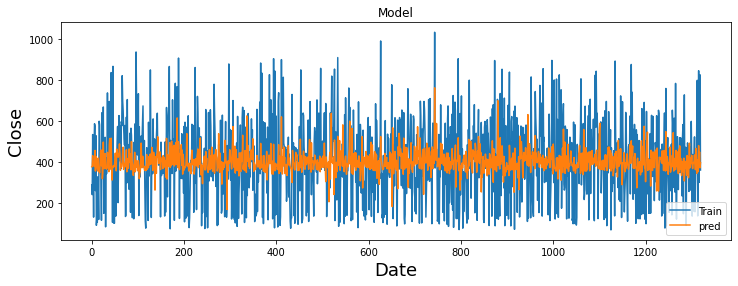

In [ ]:
valid= y_test
valid= np.append(valid,predicted,axis=1)
plt.figure(figsize=(12,4))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.plot(valid)
plt.legend(['Train','pred'],loc='lower right')
plt.show